In [1]:
#导入相关库
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df=pd.read_csv("work1data.csv")
df.index=df['Unnamed: 0'].tolist()
df=df.drop(columns='Unnamed: 0')


In [2]:
df['纬度']=df['纬度度'].values + df['纬度分'].values/ 60 + df['纬度秒'].values/ 3600
df['经度']=df['经度度'].values + df['经度分'].values/ 60 + df['经度秒'].values/ 3600
df

,纬度度,纬度分,纬度秒,经度度,经度分,经度秒,海拔,纬度,经度
研究院1号门口,37,31,32,122,4,35,10,37.525556,122.076389
东门,37,31,39,122,4,48,15,37.527500,122.080000
主楼,37,31,44,122,4,37,9,37.528889,122.076944
M楼,37,31,47,122,4,30,14,37.529722,122.075000
西南门,37,31,48,122,4,15,9,37.530000,122.070833
大服,37,31,51,122,4,30,11,37.530833,122.075000
学苑餐厅,37,31,51,122,4,36,12,37.530833,122.076667
12公寓,37,31,55,122,4,49,32,37.531944,122.080278
8公寓,37,31,57,122,4,31,16,37.532500,122.075278
学子餐厅,37,32,1,122,4,37,15,37.533611,122.076944


In [3]:
from math import sin, asin, cos, radians, fabs, sqrt

EARTH_RADIUS = 6371      # 地球平均半径大约6371km

def hav(theta):
    s = sin(theta / 2)
    return s * s
def get_distance_hav(a,b):
# 用haversine公式计算球面两点间的距离
# 经纬度转换成弧度
    (lat0,lng0)=a
    (lat1,lng1)=b
    lat0 = radians(lat0)
    lat1 = radians(lat1)
    lng0 = radians(lng0)
    lng1 = radians(lng1)
    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))      
    return distance*1000  #计量单位为米

#result = get_distance_hav(39.995304, 116.308264, 40.003304, 116.326759)
#print("距离：{:.2f}m".format(result))

In [4]:
def CacDistance(a,b):
    """
    计算两点之间的距离
    """
   # a = np.array(a)
    #b = np.array(b)
    distance = get_distance_hav(a,b)
    #c = a-b
    
    #distance = np.sqrt(np.sum(c*c))
    return distance

def CityDistance():
    """
    获取临接矩阵
    """
    locs=[]
    for i in range(15):
        locs.append((df.iloc[i,7],df.iloc[i,8]))
    n = len(locs)

    dis_mat = np.zeros([15,15])
    for i in range(n-1):
        for j in range(i+1,n):
            dist = CacDistance(locs[i],locs[j])
            dis_mat[i,j] = dist

    for i in range(n):
        dis_mat[:,i] = dis_mat[i,:]
    return dis_mat

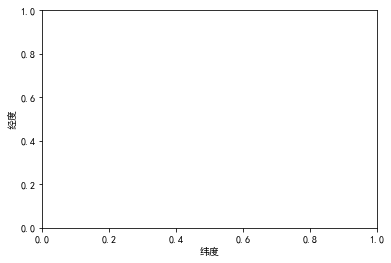

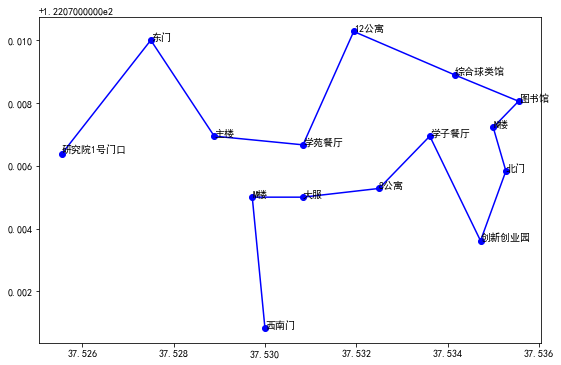

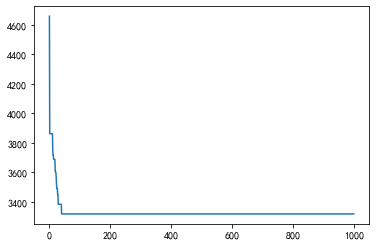

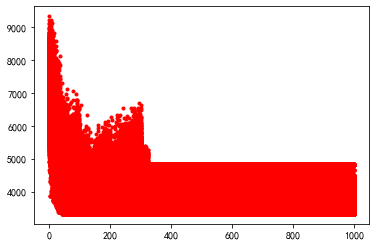

In [5]:
from scipy import spatial

num_points = 15
'''
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
'''

points_coordinate=np.array([[df.iloc[i,7],df.iloc[i,8]]  for i in range(num_points) ])

distance_matrix=np.array(CityDistance()) 
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i ], routine[i + 1]] for i in range(num_points-1)])


# %% do GA

from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=1500, max_iter=1000,prob_mut=1)
best_points, best_distance = ga_tsp.run()

# return sum([distance_matrix[routine[i], routine[i + 1]] for i in range(num_points-1)])



# %% plot
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
best_points_ = best_points
best_points_coordinate = points_coordinate[best_points_, :]
#ax[0].

#plt.axis([0,5, 0, 20])
#plt.title("geek-docs.com", fontsize=20, fontname="Times New Roman")
plt.xlabel('纬度')
plt.ylabel('经度')
plt.figure(figsize=(9,6 ))
for i in range(15):
    plt.text(best_points_coordinate[i, 0], best_points_coordinate[i, 1],df.index[best_points[i]])

plt.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-b')
plt.show()
#ax[1].
plt.plot(ga_tsp.generation_best_Y)
plt.show()
best_points
Y_history = pd.DataFrame(ga_tsp.all_history_Y)
plt.plot(Y_history.index, Y_history.values, '.', color='red')
plt.show()

#Y_history.min(axis=1).cummin().plot(kind='line')
#plt.show()

In [6]:
for i in range(15):
    
    print(df.index[best_points[i]])

西南门
M楼
大服
8公寓
学子餐厅
创新创业园
北门
N楼
图书馆
综合球类馆
12公寓
学苑餐厅
主楼
东门
研究院1号门口


In [7]:
best_distance
  

array([3319.22974636])

In [8]:
import folium

# define the world map
world_map = folium.Map()

# display world map
#world_map

In [9]:
best_points_coordinate

array([[ 37.53      , 122.07083333],
       [ 37.52972222, 122.075     ],
       [ 37.53083333, 122.075     ],
       [ 37.5325    , 122.07527778],
       [ 37.53361111, 122.07694444],
       [ 37.53472222, 122.07361111],
       [ 37.53527778, 122.07583333],
       [ 37.535     , 122.07722222],
       [ 37.53555556, 122.07805556],
       [ 37.53416667, 122.07888889],
       [ 37.53194444, 122.08027778],
       [ 37.53083333, 122.07666667],
       [ 37.52888889, 122.07694444],
       [ 37.5275    , 122.08      ],
       [ 37.52555556, 122.07638889]])

In [10]:
latitude = 37.5288
longitude = 122.076944

# Create map and display it
#san_map = folium.Map(location=[latitude, longitude], zoom_start=15)
# Create map and display it
#默认为'OpenStreetMap'风格，我们还可以选择'Stamen Terrain', 'Stamen Toner'等。
san_map= folium.Map(location=[latitude, longitude], zoom_start=15,tiles='Stamen Toner')
for i in range(len(df.index)):    
    folium.Marker(best_points_coordinate[i].tolist(),  popup=df.index[best_points[i]] ).add_to(san_map)

folium.PolyLine(best_points_coordinate.tolist(),color='grey').add_to(san_map)


# Display the map of San Francisco   popup


san_map

In [11]:
df

,纬度度,纬度分,纬度秒,经度度,经度分,经度秒,海拔,纬度,经度
研究院1号门口,37,31,32,122,4,35,10,37.525556,122.076389
东门,37,31,39,122,4,48,15,37.527500,122.080000
主楼,37,31,44,122,4,37,9,37.528889,122.076944
M楼,37,31,47,122,4,30,14,37.529722,122.075000
西南门,37,31,48,122,4,15,9,37.530000,122.070833
大服,37,31,51,122,4,30,11,37.530833,122.075000
学苑餐厅,37,31,51,122,4,36,12,37.530833,122.076667
12公寓,37,31,55,122,4,49,32,37.531944,122.080278
8公寓,37,31,57,122,4,31,16,37.532500,122.075278
学子餐厅,37,32,1,122,4,37,15,37.533611,122.076944


In [12]:
# 0 1 5 1
print(df.iloc[0,:])
print(df.iloc[1,:])
print(df.iloc[4,:])
print(df.iloc[13,:])

纬度度     37.000000
纬度分     31.000000
纬度秒     32.000000
经度度    122.000000
经度分      4.000000
经度秒     35.000000
海拔      10.000000
纬度      37.525556
经度     122.076389
Name: 研究院1号门口, dtype: float64
纬度度     37.0000
纬度分     31.0000
纬度秒     39.0000
经度度    122.0000
经度分      4.0000
经度秒     48.0000
海拔      15.0000
纬度      37.5275
经度     122.0800
Name: 东门, dtype: float64
纬度度     37.000000
纬度分     31.000000
纬度秒     48.000000
经度度    122.000000
经度分      4.000000
经度秒     15.000000
海拔       9.000000
纬度      37.530000
经度     122.070833
Name: 西南门, dtype: float64
纬度度     37.000000
纬度分     32.000000
纬度秒      7.000000
经度度    122.000000
经度分      4.000000
经度秒     33.000000
海拔      22.000000
纬度      37.535278
经度     122.075833
Name: 北门, dtype: float64


In [13]:

num_points = 15


distance_matrix=np.array(CityDistance()) 


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    # start_point 本身不参与优化。给一个固定的值，参与计算总路径
   
    routine=np.concatenate([[0],routine]) 
    return sum([distance_matrix[routine[i ], routine[i + 1]] for i in range(num_points)])

from sko.GA import GA_TSP
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=500, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_distance:',best_distance)

for i in range(15):
    print(df.index[best_points[i]])


best_distance: [3319.22974636]
研究院1号门口
东门
主楼
学苑餐厅
12公寓
综合球类馆
图书馆
N楼
北门
创新创业园
学子餐厅
8公寓
大服
M楼
西南门


In [14]:

num_points = 15


distance_matrix=np.array(CityDistance()) 


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    # start_point 本身不参与优化。给一个固定的值，参与计算总路径
   
    routine=np.concatenate([[1],routine]) 
    return sum([distance_matrix[routine[i ], routine[i + 1]] for i in range(num_points)])

from sko.GA import GA_TSP
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=500, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_distance:',best_distance)

for i in range(15):
    print(df.index[best_points[i]])

best_distance: [3382.53272003]
东门
研究院1号门口
主楼
学苑餐厅
12公寓
综合球类馆
图书馆
N楼
北门
创新创业园
学子餐厅
8公寓
大服
M楼
西南门


In [15]:

num_points = 15


distance_matrix=np.array(CityDistance()) 


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    # start_point 本身不参与优化。给一个固定的值，参与计算总路径
   
    routine=np.concatenate([[4],routine]) 
    return sum([distance_matrix[routine[i ], routine[i + 1]] for i in range(num_points)])

from sko.GA import GA_TSP
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=500, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_distance:',best_distance)

for i in range(15):
    print(df.index[best_points[i]])

best_distance: [3335.54800852]
西南门
M楼
大服
8公寓
创新创业园
北门
图书馆
N楼
学子餐厅
综合球类馆
12公寓
学苑餐厅
主楼
东门
研究院1号门口


In [16]:

num_points = 15


distance_matrix=np.array(CityDistance()) 


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    # start_point 本身不参与优化。给一个固定的值，参与计算总路径
   
    routine=np.concatenate([[13],routine]) 
    return sum([distance_matrix[routine[i ], routine[i + 1]] for i in range(num_points)])

from sko.GA import GA_TSP
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=500, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_distance:',best_distance)

for i in range(15):
    print(df.index[best_points[i]])

best_distance: [3510.67560346]
北门
创新创业园
8公寓
学子餐厅
N楼
图书馆
综合球类馆
12公寓
学苑餐厅
大服
西南门
M楼
主楼
东门
研究院1号门口
